# [引用](https://github.com/Tatsuki-Oike/reinforcement/blob/master/02.%E3%83%9E%E3%83%AB%E3%82%B3%E3%83%95%E6%B1%BA%E5%AE%9A%E9%81%8E%E7%A8%8B%E3%81%A8%E3%83%99%E3%83%AB%E3%83%9E%E3%83%B3%E6%96%B9%E7%A8%8B%E5%BC%8F.ipynb)

# 環境とエージェント

In [64]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

In [65]:
class Environment():
    
    def __init__(self, size=3, lucky=[]):
        self.size = size
        self.lucky = lucky
        self.goal = (size - 1, size - 1)
        self.states = [(x, y) for x in range(size) for y in range(size)]
    
    def next_state(self, s, a):
        s_next = (s[0] + a[0], s[1] + a[1])
        
        if s == self.goal:
            return s
        
        if s_next not in self.states:
            return s
        
        if s_next in self.lucky:
            if np.random.random() < 0.8:
                return self.goal
            else:
                return self.s_next
        
        return s_next
        
    def reward(self, s, s_next):
        if s == self.goal:
            return 0
        if s_next == self.goal:
            return 1
        return 0

In [66]:
class Agent:
    def __init__(self, environment, policy=[0, 0, 1/2, 1/2]):
        self.actions = [(-1, 0), (0, -1), (1, 0), (0, 1)]
        self.environment = environment
    
    def action(self, s, a):
        s_next = self.environment.next_state(s, a)
        r = self.environment.reward(s, s_next)
        
        return r, s_next

# エピソードの取得

In [67]:
def get_episode(agent, gamma=0.9):
    print("s, a, s_next, r")
    s = (0, 0)
    
    episode = []
    r_sum = 0
    num = 0
    
    while True:
        a = agent.actions[np.random.randint(0, 4)]
#         print(s, a, r_sum)
        r, s_next = agent.action(s, a)
        episode.append((s, a, s_next, r))
        
        r_sum += np.power(gamma, num) * r
        s = s_next
        num += 1
        
        if s == agent.environment.goal:
            break
    
    return episode, r_sum

# 可視化用関数

In [68]:
def show_maze(environment):
    size = environment.size
    fig = plt.figure(figsize=(3, 3))
    lower_value = -0.5
    upper_value = size - 0.5
    
    plt.plot([lower_value, lower_value], [lower_value, upper_value], color="k")
    plt.plot([lower_value, upper_value], [upper_value, upper_value], color="k")
    plt.plot([upper_value, upper_value], [upper_value, lower_value], color="k")
    plt.plot([upper_value, lower_value], [lower_value, lower_value], color="k")
    
    for i in range(size):
        for j in range(size):
            plt.text(i, j, f"{i + size * j}", size=20, ha="center", va="center")
            if (i, j) in environment.lucky:
                x = np.array([i - 0.5, i - 0.5, i + 0.5, i + 0.5])
                y = np.array([j - 0.5, j + 0.5, j + 0.5, j - 0.5])
                plt.fill(x, y, color="lightgreen")
    
    plt.axis("off")

# シミュレーション

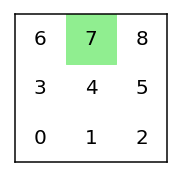

In [69]:
env1 = Environment(lucky=[(1, 2)])
agent1 = Agent(env1)
show_maze(env1)

In [70]:
get_episode(agent1)

s, a, s_next, r


([((0, 0), (0, -1), (0, 0), 0),
  ((0, 0), (0, 1), (0, 1), 0),
  ((0, 1), (-1, 0), (0, 1), 0),
  ((0, 1), (-1, 0), (0, 1), 0),
  ((0, 1), (0, 1), (0, 2), 0),
  ((0, 2), (0, -1), (0, 1), 0),
  ((0, 1), (0, 1), (0, 2), 0),
  ((0, 2), (0, -1), (0, 1), 0),
  ((0, 1), (0, 1), (0, 2), 0),
  ((0, 2), (-1, 0), (0, 2), 0),
  ((0, 2), (-1, 0), (0, 2), 0),
  ((0, 2), (0, -1), (0, 1), 0),
  ((0, 1), (-1, 0), (0, 1), 0),
  ((0, 1), (0, 1), (0, 2), 0),
  ((0, 2), (0, -1), (0, 1), 0),
  ((0, 1), (-1, 0), (0, 1), 0),
  ((0, 1), (1, 0), (1, 1), 0),
  ((1, 1), (0, -1), (1, 0), 0),
  ((1, 0), (1, 0), (2, 0), 0),
  ((2, 0), (-1, 0), (1, 0), 0),
  ((1, 0), (1, 0), (2, 0), 0),
  ((2, 0), (0, -1), (2, 0), 0),
  ((2, 0), (1, 0), (2, 0), 0),
  ((2, 0), (-1, 0), (1, 0), 0),
  ((1, 0), (0, 1), (1, 1), 0),
  ((1, 1), (-1, 0), (0, 1), 0),
  ((0, 1), (1, 0), (1, 1), 0),
  ((1, 1), (-1, 0), (0, 1), 0),
  ((0, 1), (0, -1), (0, 0), 0),
  ((0, 0), (1, 0), (1, 0), 0),
  ((1, 0), (1, 0), (2, 0), 0),
  ((2, 0), (-1, 0), (

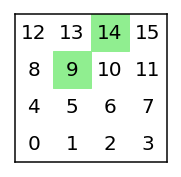

In [72]:
env2 = Environment(size=4, lucky=[(1, 2), (2, 3)])
agent2 = Agent(env2)
show_maze(env2)

In [73]:
get_episode(agent2)

s, a, s_next, r


([((0, 0), (0, 1), (0, 1), 0),
  ((0, 1), (1, 0), (1, 1), 0),
  ((1, 1), (-1, 0), (0, 1), 0),
  ((0, 1), (1, 0), (1, 1), 0),
  ((1, 1), (0, -1), (1, 0), 0),
  ((1, 0), (0, -1), (1, 0), 0),
  ((1, 0), (0, -1), (1, 0), 0),
  ((1, 0), (0, 1), (1, 1), 0),
  ((1, 1), (0, 1), (3, 3), 1)],
 0.4304672100000001)